In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
!pip install ucimlrepo

In [67]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

# metadata
print(hepatitis.metadata)

# variable information
print(hepatitis.variables)


{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

In [68]:
hepatitis.data.targets.value_counts()

Class
2        123
1         32
Name: count, dtype: int64

In [69]:
X.columns

Index(['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
       'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
       'Histology'],
      dtype='object')

In [70]:
df=pd.concat([X, y], axis=1)
df.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


In [71]:
df.dtypes

Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
Class                int64
dtype: object

In [72]:
df.isnull().sum()

Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
Class               0
dtype: int64

In [73]:
df=df.fillna(df.mean())
df.isnull().sum()

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64

In [74]:
df.isnull().sum()

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64

In [75]:
df['Class'].unique()

array([2, 1])

In [76]:
df['Class'] = df['Class'].replace({1: 0, 2: 1})
df['Class'].unique()

array([1, 0])

In [77]:
df['Class'].unique()

array([1, 0])

**Train test split**

In [105]:
X = df.drop('Class',axis='columns')
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [106]:
def monitor_class_distribution(y):
  class_distribution = np.bincount(y)
  if class_distribution[1]>class_distribution[0]:
    imbalance_ratio = class_distribution[1] / class_distribution[0]
  else:
    imbalance_ratio = class_distribution[0] / class_distribution[1]
  return imbalance_ratio

In [107]:
imb_ratio=monitor_class_distribution(y)
print(imb_ratio)

3.84375


before applying sampling

In [80]:
import time
import psutil
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


def train_resource_monitor(X_train, y_train):
  model= xgb.XGBClassifier(
      objective='binary:logistic',
      max_depth=3,
      learning_rate=0.1,
      n_estimators=100,
      subsample=0.8,
      colsample_bytree=0.8
  )
  cpu_usage = []
  memory_usage = []
  initial_cpu_percent = psutil.cpu_percent(interval=None)
  initial_memory_percent = psutil.virtual_memory().percent
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  execution_time = end_time - start_time
  final_cpu_percent = psutil.cpu_percent(interval=None)
  final_memory_percent = psutil.virtual_memory().percent
  size=len(y_train)
  print(f"Input size: {size}, Execution time: {execution_time:.6f} seconds")
  print(f"Initial CPU Usage: {initial_cpu_percent}%")
  print(f"Final CPU Usage: {final_cpu_percent}%")
  print(f"Initial Memory Usage: {initial_memory_percent}%")
  print(f"Final Memory Usage: {final_memory_percent}%")
  return model

In [81]:
model1=train_resource_monitor(X_train, y_train)

Input size: 124, Execution time: 0.190454 seconds
Initial CPU Usage: 33.8%
Final CPU Usage: 100.0%
Initial Memory Usage: 8.4%
Final Memory Usage: 8.4%


In [82]:
from sklearn.model_selection import KFold
# Define the number of folds for cross-validation
def k_fold_validation(X_train,y_train,model):
  X_train = X_train.to_numpy()
  y_train = y_train.to_numpy()
  k=5
  kf=KFold(n_splits=k,shuffle=True,random_state=42)
  cv_scores=[]
  cv_rocs=[]
  for train_index,val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    y_prob_roc=model.predict_proba(X_val_fold)[:, 1]
    accuracy = accuracy_score(y_val_fold, y_pred_val)
    roc_auc=roc_auc_score(y_val_fold, y_prob_roc)
    cv_scores.append(accuracy)
    cv_rocs.append(roc_auc)
    print("Cross-validation scores:", cv_scores)
    print("Average cross-validation score:", np.mean(cv_scores))
    print("Cross-validation roc-auc:", cv_rocs)
    print("Average cross-validation roc-auc:", np.mean(cv_rocs))
    print('-----------------------------------------------------------------')


In [83]:
#print(type(y_train))
k_fold_validation(X_train, y_train,model1)

Cross-validation scores: [0.84]
Average cross-validation score: 0.84
Cross-validation roc-auc: [0.7380952380952381]
Average cross-validation roc-auc: 0.7380952380952381
-----------------------------------------------------------------
Cross-validation scores: [0.84, 0.88]
Average cross-validation score: 0.86
Cross-validation roc-auc: [0.7380952380952381, 0.9236111111111112]
Average cross-validation roc-auc: 0.8308531746031746
-----------------------------------------------------------------
Cross-validation scores: [0.84, 0.88, 0.88]
Average cross-validation score: 0.8666666666666667
Cross-validation roc-auc: [0.7380952380952381, 0.9236111111111112, 0.9130434782608696]
Average cross-validation roc-auc: 0.8582499424890729
-----------------------------------------------------------------
Cross-validation scores: [0.84, 0.88, 0.88, 0.88]
Average cross-validation score: 0.87
Cross-validation roc-auc: [0.7380952380952381, 0.9236111111111112, 0.9130434782608696, 1.0]
Average cross-validation

In [84]:
# Making predictions
y_pred = model1.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8387096774193549


In [85]:
y_prob = model1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7666666666666666


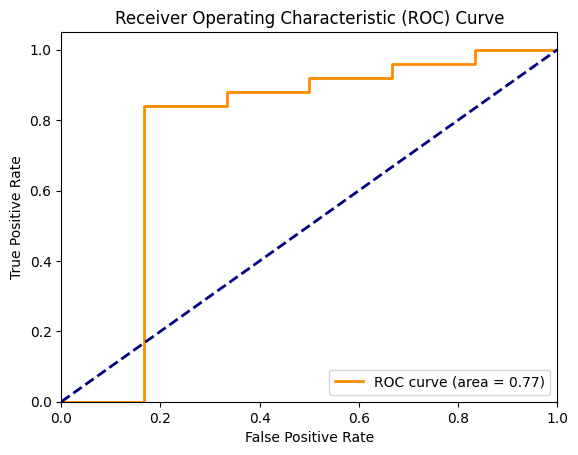

In [86]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.83      1.00      0.91        25

    accuracy                           0.84        31
   macro avg       0.92      0.58      0.60        31
weighted avg       0.87      0.84      0.79        31



applying sampling

In [88]:
X2 = df.drop('Class',axis='columns')
y2 = df['Class']

In [89]:
print(X2.dtypes)

Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
dtype: object


In [90]:
X2.shape, y2.shape

((155, 19), (155,))

In [91]:
y2.value_counts()

Class
1    123
0     32
Name: count, dtype: int64

In [92]:
df.columns[:-1].tolist()

['Age',
 'Sex',
 'Steroid',
 'Antivirals',
 'Fatigue',
 'Malaise',
 'Anorexia',
 'Liver Big',
 'Liver Firm',
 'Spleen Palpable',
 'Spiders',
 'Ascites',
 'Varices',
 'Bilirubin',
 'Alk Phosphate',
 'Sgot',
 'Albumin',
 'Protime',
 'Histology']

In [93]:
def monitor_class_distribution(y):
  class_distribution = np.bincount(y)
  if class_distribution[1]>class_distribution[0]:
    imbalance_ratio = class_distribution[1] / class_distribution[0]
  else:
    imbalance_ratio = class_distribution[0] / class_distribution[1]
  return imbalance_ratio

In [94]:
import pandas as pd
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids

def adjust_sampling_parameters(X,y):
  # Apply KMeansSMOTE to the minority class
  kmeans_smote = KMeansSMOTE(sampling_strategy='auto', k_neighbors=5, cluster_balance_threshold=0.0)
  X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)

  # Apply Cluster Centroids undersampling to the majority class
  cluster_centroids = ClusterCentroids(sampling_strategy='auto')
  X_cluster_centroids, y_cluster_centroids = cluster_centroids.fit_resample(X, y)

  # Concatenate the resampled data
  X_combined_resampled = np.concatenate((X_kmeans_smote, X_cluster_centroids), axis=0)
  y_combined_resampled = np.concatenate((y_kmeans_smote, y_cluster_centroids), axis=0)

  # Convert combined resampled data to DataFrame
  combined_df = pd.DataFrame(data=X_combined_resampled, columns=X.columns.tolist())
  combined_df['Class'] = y_combined_resampled

  return combined_df



In [95]:
tolerance=0.2
def class_distribution_check(combined_df):
  X_combined = combined_df.drop('Class',axis='columns')
  y_combined = combined_df['Class']
  class_distribution=monitor_class_distribution(y_combined)
  while abs(class_distribution-1)>tolerance:
    #print(abs(class_distribution-1))
    combine_data=adjust_sampling_parameters(X_combined, y_combined)
    X_combined=combine_data.drop('Class',axis='columns')
    y_combined=combine_data['Class']
    class_distribution=monitor_class_distribution(y_combined)
  return X_combined, y_combined

In [96]:
combined_df=adjust_sampling_parameters(X2,y2)
X_combined,y_combined=class_distribution_check(combined_df)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [97]:
print((X_combined.shape))

(311, 19)


In [98]:
# Training the model
model2=train_resource_monitor(X_train, y_train)

# Making predictions
y_pred = model2.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Input size: 248, Execution time: 0.050780 seconds
Initial CPU Usage: 59.2%
Final CPU Usage: 100.0%
Initial Memory Usage: 11.7%
Final Memory Usage: 11.7%
Accuracy: 0.9682539682539683


In [99]:
k_fold_validation(X_combined, y_combined,model2)

Cross-validation scores: [0.9841269841269841]
Average cross-validation score: 0.9841269841269841
Cross-validation roc-auc: [1.0]
Average cross-validation roc-auc: 1.0
-----------------------------------------------------------------
Cross-validation scores: [0.9841269841269841, 0.8870967741935484]
Average cross-validation score: 0.9356118791602662
Cross-validation roc-auc: [1.0, 0.9625390218522373]
Average cross-validation roc-auc: 0.9812695109261187
-----------------------------------------------------------------
Cross-validation scores: [0.9841269841269841, 0.8870967741935484, 0.9032258064516129]
Average cross-validation score: 0.924816521590715
Cross-validation roc-auc: [1.0, 0.9625390218522373, 0.9947089947089947]
Average cross-validation roc-auc: 0.985749338853744
-----------------------------------------------------------------
Cross-validation scores: [0.9841269841269841, 0.8870967741935484, 0.9032258064516129, 0.9354838709677419]
Average cross-validation score: 0.9274833589349

In [100]:
y_prob = model2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


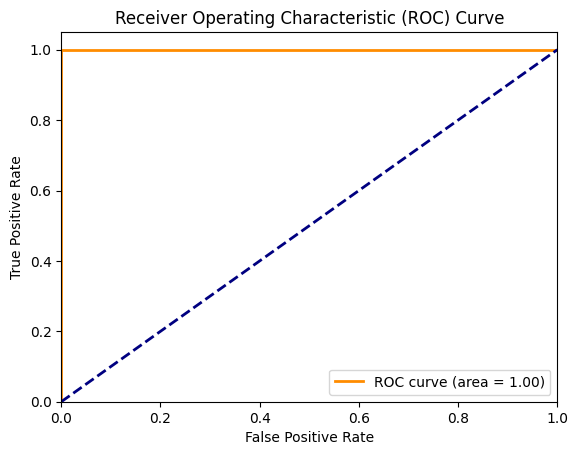

In [101]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [102]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.95      0.97        38

    accuracy                           0.97        63
   macro avg       0.96      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



In [115]:
import pickle

# Assuming you have trained an XGBoost model named 'model'

# Save the model to a file
with open('xgboost_model_hepatites.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [122]:
import pickle

# Load the model from the file
with open('xgboost_model_hepatites.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [123]:
predictions = loaded_model.predict(X_test)

In [124]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.45      1.00      0.62        14

    accuracy                           0.45        31
   macro avg       0.23      0.50      0.31        31
weighted avg       0.20      0.45      0.28        31

